In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive/')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PCOS_data_extra.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
df

,Weight gain(Y/N),hair growth(Y/N),Pimples(Y/N),Fast food (Y/N),Skin darkening (Y/N),Cycle length(days),Cycle(R/I),Marraige Status (Yrs),Hip(inch),Weight (Kg),PCOS (Y/N)
0,0,0,0,1,0,5,2,7.0,36,44.6,0
1,0,0,0,0,0,5,2,11.0,38,65.0,0
2,0,0,1,1,0,5,2,10.0,40,68.8,1
3,0,0,0,0,0,5,2,4.0,42,65.0,0
4,0,0,0,0,0,5,2,1.0,37,52.0,0
...,...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,5,2,8.0,28,50.0,0
537,1,0,0,0,0,5,2,4.0,34,63.2,0
538,0,0,0,0,0,6,2,8.0,30,54.0,0
539,0,0,1,0,0,2,4,2.0,28,50.0,0


In [5]:

# Remove the 'Patient File No.' column (ID) and 'PCOS (Y/N)' column (class)

# Fill missing values with the mean of each column
df = df.fillna(df.mean())

# Split the data into features (X) and target (y)
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']
y


0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: PCOS (Y/N), Length: 541, dtype: int64

In [6]:
X

,Weight gain(Y/N),hair growth(Y/N),Pimples(Y/N),Fast food (Y/N),Skin darkening (Y/N),Cycle length(days),Cycle(R/I),Marraige Status (Yrs),Hip(inch),Weight (Kg)
0,0,0,0,1,0,5,2,7.0,36,44.6
1,0,0,0,0,0,5,2,11.0,38,65.0
2,0,0,1,1,0,5,2,10.0,40,68.8
3,0,0,0,0,0,5,2,4.0,42,65.0
4,0,0,0,0,0,5,2,1.0,37,52.0
...,...,...,...,...,...,...,...,...,...,...
536,0,0,0,0,0,5,2,8.0,28,50.0
537,1,0,0,0,0,5,2,4.0,34,63.2
538,0,0,0,0,0,6,2,8.0,30,54.0
539,0,0,1,0,0,2,4,2.0,28,50.0


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Reshape the input data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [8]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/10
14/14 [==============================] - 3s 47ms/step - loss: 0.6779 - accuracy: 0.6343 - val_loss: 0.6413 - val_accuracy: 0.7706
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.6258 - accuracy: 0.7940 - val_loss: 0.5895 - val_accuracy: 0.8257
Epoch 3/10
14/14 [==============================] - 0s 5ms/step - loss: 0.5815 - accuracy: 0.8009 - val_loss: 0.5428 - val_accuracy: 0.8532
Epoch 4/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5427 - accuracy: 0.8125 - val_loss: 0.5013 - val_accuracy: 0.8532
Epoch 5/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5089 - accuracy: 0.8171 - val_loss: 0.4641 - val_accuracy: 0.8532
Epoch 6/10
14/14 [==============================] - 0s 7ms/step - loss: 0.4785 - accuracy: 0.8426 - val_loss: 0.4356 - val_accuracy: 0.8624
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.4557 - accuracy: 0.8380 - val_loss: 0.4115 - val_accuracy: 0.8716
Epoch 8/10
14/14 [=

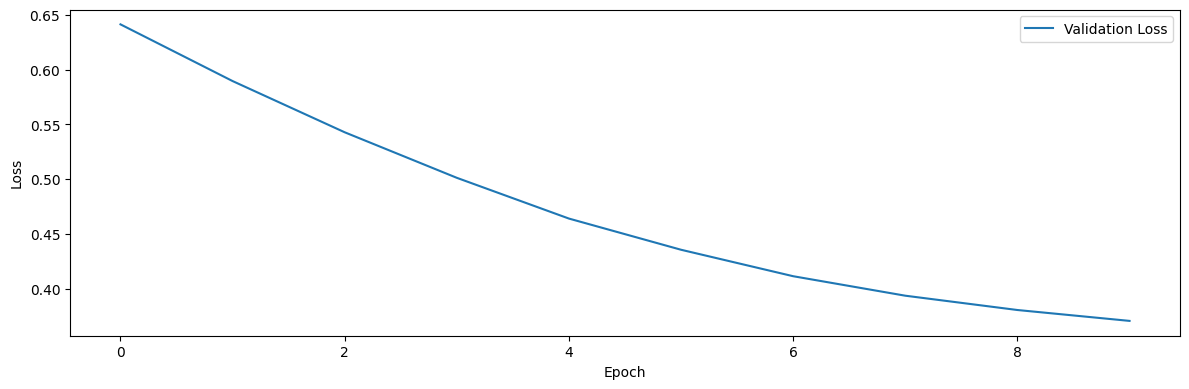

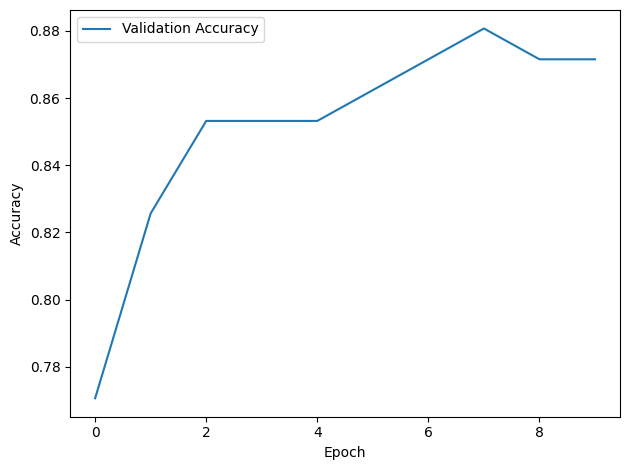

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot validation loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


plt.subplot(1, 1, 1)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

4/4 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        77
           1       0.80      0.75      0.77        32

    accuracy                           0.87       109
   macro avg       0.85      0.84      0.84       109
weighted avg       0.87      0.87      0.87       109

F1 Score: 0.7742
Precision: 0.8000
Recall: 0.7500


In [11]:
from sklearn.metrics import confusion_matrix

# Calculate F1 score, precision, and recall
f1 = f1_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nF1 Score: {:.4f}".format(f1))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: {:.4f}".format(loss))
print("Test Accuracy: {:.4f}".format(accuracy))

Confusion Matrix:
[[71  6]
 [ 8 24]]

F1 Score: 0.7742
Precision: 0.8000
Recall: 0.7500
4/4 [==============================] - 0s 7ms/step - loss: 0.3707 - accuracy: 0.8716
Test Loss: 0.3707
Test Accuracy: 0.8716


In [12]:
def evaluate_threshold(model, X_test, y_test, threshold):
    y_pred_probs = model.predict(X_test)
    y_pred_classes = (y_pred_probs > threshold).astype(int).flatten()

    print(f"Threshold: {threshold}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))

    # Calculate F1 score, precision, and recall
    f1 = f1_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)

    print(f'F1 Score: {f1:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')

    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Test loss: {loss:.4f}')
    print(f'Test accuracy: {accuracy:.4f}')

# Assuming 'model', 'X_test', and 'y_test' are already defined

# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:
    print("\n=======================================")
    evaluate_threshold(model, X_test, y_test, threshold)
    print("=======================================\n")


4/4 [==============================] - 0s 4ms/step
Threshold: 0.3
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.81        77
           1       0.56      0.88      0.68        32

    accuracy                           0.76       109
   macro avg       0.75      0.79      0.75       109
weighted avg       0.82      0.76      0.77       109

F1 Score: 0.6829
Precision: 0.5600
Recall: 0.8750
4/4 [==============================] - 0s 5ms/step - loss: 0.3707 - accuracy: 0.8716
Test loss: 0.3707
Test accuracy: 0.8716


4/4 [==============================] - 0s 3ms/step
Threshold: 0.4
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        77
           1       0.72      0.88      0.79        32

    accuracy                           0.86       109
   macro avg       0.83      0.87      0.84       109
weighted avg       0.88      0.86      0.87  